<a href="https://colab.research.google.com/github/amitdivekar30/Apple_Fruit_Detection/blob/main/ModelTrainingOnColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Models on Colab

Install TensorFlow and Numpy

In [36]:
!pip install --upgrade pip
!pip install --upgrade protobuf 

In [37]:
%tensorflow_version 2.0
import tensorflow as tf
print(tf.__version__)

!pip install numpy

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.4.0


Check GPU status

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7410 sha256=82d5be4a84f9c0e968852697293f4d3ff7b83fd607bdc9007a81679760b5d50b
  Stored in directory: /root/.cache/pip/wheels/79/c1/b2/b6fc2647f693a084da25e1d31328ab3dbb565cc58fea37e973
Successfully built gputil
Gen RAM Free: 12.2 GB  | Proc size: 1.1 GB
GPU RAM Free: 14852MB | Used: 227MB | Util   2% | Total 15079MB


Mount Google Drive folder

In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

# change to working tensorflow directory on the drive
%cd '/content/gdrive/My Drive/apple_code2/models'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/apple_code2/models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install protobuf and compile, install setup.py

In [ ]:
%cd /content/gdrive/MyDrive/apple_code2/models/research

/content/gdrive/MyDrive/apple_code2/models/research


In [ ]:
!python -m pip install .

Processing /content/gdrive/MyDrive/apple_code2/models/research
     |████████████████████████████████| 9.0 MB 7.0 MB/s 
     |████████████████████████████████| 151 kB 59.5 MB/s 
     |████████████████████████████████| 2.0 MB 57.3 MB/s 
     |████████████████████████████████| 829 kB 74.3 MB/s 
     |████████████████████████████████| 41 kB 585 kB/s 
     |████████████████████████████████| 56 kB 5.5 MB/s 
     |████████████████████████████████| 106 kB 68.2 MB/s 
     |████████████████████████████████| 17.7 MB 116 kB/s 
     |████████████████████████████████| 61 kB 9.4 MB/s 
     |████████████████████████████████| 1.1 MB 68.0 MB/s 
     |████████████████████████████████| 95 kB 6.9 MB/s 
     |████████████████████████████████| 269 kB 62.0 MB/s 
     |████████████████████████████████| 172 kB 71.3 MB/s 
     |████████████████████████████████| 352 kB 67.3 MB/s 
     |████████████████████████████████| 37.6 MB 9.2 kB/s 
     |████████████████████████████████| 1.2 MB 57.5 MB/s 
     |████████████

In [ ]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython
%cd /content/gdrive/MyDrive/apple_code2/models/research
!protoc object_detection/protos/*.proto --python_out=.

import os
os.environ['PYTHONPATH'] += ':/content/gdrive/MyDrive/apple_code/models/research:/content/gdrive/My Drive/Tensorflow/models/research/slim'

!python setup.py build
!python setup.py install

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-tk is already the newest version (2.7.17-1~18.04).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 16 not upgraded.
Need to get 1,615 kB of archives.
After this operation, 8,907 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd

Check remaining GPU time

In [ ]:
import time, psutil
Start = time.time()- psutil.boot_time()
Left= 12*3600 - Start
print('Time remaining for this session is: ', Left/3600)

Time remaining for this session is:  11.468863374723329


Start training

In [ ]:
%cd /content/gdrive/MyDrive/apple_code2/models/research/object_detection

/content/gdrive/MyDrive/apple_code2/models/research/object_detection


In [ ]:
!pip install tf_slim
%cd /content/gdrive/MyDrive/apple_code2/models/research/object_detection
os.environ['PYTHONPATH'] += ':/content/gdrive/MyDrive/apple_code/models/research/:/content/gdrive/My Drive/Tensorflow/models/research/slim'

!python model_main_tf2.py \
    --pipeline_config_path=training1/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.config \
    --model_dir=training1 \
    --alsologtostderr

/content/gdrive/MyDrive/apple_code2/models/research/object_detection
2021-01-19 02:50:33.954845: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-01-19 02:50:37.209746: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-19 02:50:37.210775: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-19 02:50:37.215763: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-19 02:50:37.216325: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2021-01-19 02:

In [ ]:
!pip install tf_slim

Export inference graph

In [45]:
%cd /content/gdrive/MyDrive/apple_code/models/research/object_detection
os.environ['PYTHONPATH'] += ':/content/gdrive/MyDrive/apple_code/models/research/:/content/gdrive/My Drive/Tensorflow/models/research/slim'

/content/gdrive/MyDrive/apple_code/models/research/object_detection


In [ ]:
%cd /content/gdrive/MyDrive/apple_code/models/research/

/content/gdrive/MyDrive/apple_code/models/research


In [60]:
#  .ckpt needs to be updated every time to match last .ckpt generated
#  .config needs to be updated when changing model
!python exporter_main_v2.py \
    --trained_checkpoint_dir=/content/gdrive/MyDrive/apple_code2/models/research/object_detection/training1 \
    --pipeline_config_path=/content/gdrive/MyDrive/apple_code2/models/research/object_detection/training1/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.config \
    --output_directory /content/gdrive/MyDrive/apple_code2/models/research/object_detection/inference_graph1


2021-01-19 08:31:49.180686: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-01-19 08:31:52.059936: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-19 08:31:52.061094: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-19 08:31:52.066275: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-19 08:31:52.066716: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2021-01-19 08:31:52.066757: I tensorflow/stream_executor/platform/default/dso_loade

Zip file in Google Drive

In [61]:
!zip -r model_graph.zip /content/gdrive/MyDrive/apple_code2/models/research/object_detection/inference_graph1

  adding: content/gdrive/MyDrive/apple_code2/models/research/object_detection/inference_graph1/ (stored 0%)
  adding: content/gdrive/MyDrive/apple_code2/models/research/object_detection/inference_graph1/checkpoint/ (stored 0%)
  adding: content/gdrive/MyDrive/apple_code2/models/research/object_detection/inference_graph1/checkpoint/ckpt-0.data-00000-of-00001 (deflated 7%)
  adding: content/gdrive/MyDrive/apple_code2/models/research/object_detection/inference_graph1/checkpoint/ckpt-0.index (deflated 80%)
  adding: content/gdrive/MyDrive/apple_code2/models/research/object_detection/inference_graph1/checkpoint/checkpoint (deflated 41%)
  adding: content/gdrive/MyDrive/apple_code2/models/research/object_detection/inference_graph1/saved_model/ (stored 0%)
  adding: content/gdrive/MyDrive/apple_code2/models/research/object_detection/inference_graph1/saved_model/variables/ (stored 0%)
  adding: content/gdrive/MyDrive/apple_code2/models/research/object_detection/inference_graph1/saved_model/var

In [51]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont


from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [ ]:
import tensorflow as tf

In [52]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [53]:
labelmap_path='/content/gdrive/MyDrive/apple_code2/models/research/object_detection/training1/labelmap.pbtxt'

In [54]:
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

In [ ]:
output_directory = '/content/gdrive/MyDrive/apple_code2/models/research/object_detection/inference_graph'

In [56]:
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'inference_graph1/saved_model')

In [57]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

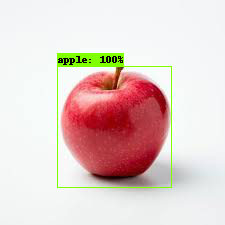

Total Number of apples in Image:  1


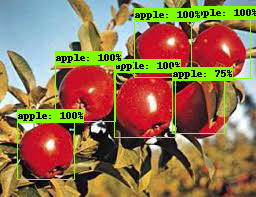

Total Number of apples in Image:  6


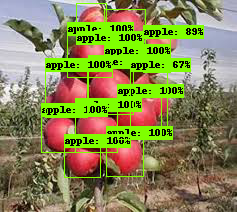

Total Number of apples in Image:  12


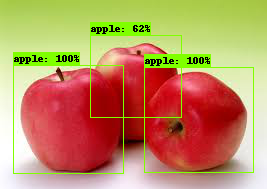

Total Number of apples in Image:  3


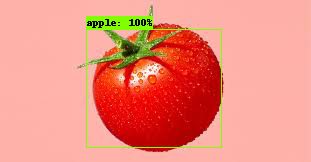

Total Number of apples in Image:  1


In [98]:
for image_path in glob.glob('/content/gdrive/MyDrive/apple_code2/models/research/object_detection/apple_test/*.jpg'):
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=1)
  display(Image.fromarray(image_np))
  final_score = np.squeeze(output_dict['detection_scores'])    
  count = 0
  for i in range(len(final_score)):
    if final_score[i] is None or final_score[i] > 0.5:
      count = count + 1
  print('Total Number of apples in Image: ',count)
